In [1]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
import matplotlib.pyplot as plt

# Prepare dataset

In [2]:
# `ToTensor` converts the image data from PIL type to 32-bit floating point
# tensors. It divides all numbers by 255 so that all pixel values are between
# 0 and 1
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

<Figure size 648x324 with 0 Axes>

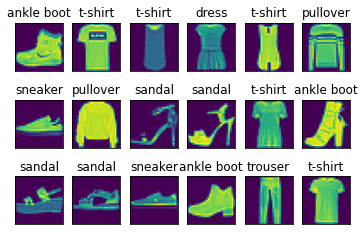

In [3]:


def get_fashion_mnist_labels(labels):
    """Return text labels for the Fashion-MNIST dataset."""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    plt.figure(figsize=figsize)
    fig, axes =  plt.subplots(num_rows, num_cols)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # Tensor Image
            ax.imshow(img.numpy())
        else:
            # PIL Image
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 3, 6, titles=get_fashion_mnist_labels(y));


In [4]:
train_iter = data.DataLoader(mnist_train, batch_size=4096, shuffle=True, num_workers=4)
test_iter = data.DataLoader(mnist_test, batch_size=4096, shuffle=False, num_workers=4)

# Create model

In [5]:
n_inputs = 784
n_outputs = 10

weights = torch.normal(0,0.01, size=(n_inputs, n_outputs), requires_grad=True)
biases = torch.zeros(n_outputs, requires_grad=True)


def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(1, keepdim=True)

def net(X):
    X_flat = X.reshape((-1, n_inputs))
    # print(f'{X_flat.shape=} {weights.shape=}')
    y_hat = torch.matmul(X_flat, weights) + biases
    return softmax(y_hat)


# Define loss & accuracy

In [6]:
def crossentropy(yt, yp):
    return -torch.log(yp[range(len(yp)),yt])

x_b,y_b = next(iter(test_iter))
y_hat = net(x_b)
crossentropy(y_b, y_hat)

tensor([2.3562, 2.1975, 2.4121,  ..., 2.4527, 2.1355, 2.2341],
       grad_fn=<NegBackward0>)

In [7]:
def eval_accuracy(net, dataset):
    sum = 0.0
    count = 0
    for x_batch, y_batch in dataset:
        y_hat = net(x_batch)
        is_correct = torch.argmax(y_hat, axis=1).type(y_batch.dtype) == y_batch
        sum += torch.sum(is_correct)
        count += len(y_batch)
    return sum / count

eval_accuracy(net, test_iter)

tensor(0.1559)

# Train

100%|██████████| 15/15 [00:02<00:00,  5.25it/s]


epoch=0 lr=0.1000 loss=3129.6880 accu=0.6784


100%|██████████| 15/15 [00:02<00:00,  6.72it/s]


epoch=1 lr=0.0990 loss=2564.9893 accu=0.7005


100%|██████████| 15/15 [00:02<00:00,  5.86it/s]


epoch=2 lr=0.0980 loss=2248.6382 accu=0.7349


100%|██████████| 15/15 [00:02<00:00,  6.06it/s]


epoch=3 lr=0.0970 loss=2080.9102 accu=0.7492


100%|██████████| 15/15 [00:02<00:00,  6.60it/s]


epoch=4 lr=0.0961 loss=2078.9773 accu=0.7650


100%|██████████| 15/15 [00:02<00:00,  5.77it/s]


epoch=5 lr=0.0951 loss=1971.1604 accu=0.7715


100%|██████████| 15/15 [00:02<00:00,  6.10it/s]


epoch=6 lr=0.0941 loss=1881.5383 accu=0.7774


100%|██████████| 15/15 [00:02<00:00,  5.52it/s]


epoch=7 lr=0.0932 loss=1803.5371 accu=0.7846


100%|██████████| 15/15 [00:02<00:00,  6.72it/s]


epoch=8 lr=0.0923 loss=1766.8019 accu=0.7893


100%|██████████| 15/15 [00:02<00:00,  6.76it/s]


epoch=9 lr=0.0914 loss=1721.1390 accu=0.7928


100%|██████████| 15/15 [00:02<00:00,  5.57it/s]


epoch=10 lr=0.0904 loss=1703.6588 accu=0.7969


100%|██████████| 15/15 [00:02<00:00,  6.83it/s]


epoch=11 lr=0.0895 loss=1636.2781 accu=0.7986


100%|██████████| 15/15 [00:02<00:00,  6.49it/s]


epoch=12 lr=0.0886 loss=1659.0278 accu=0.8008


100%|██████████| 15/15 [00:02<00:00,  6.92it/s]


epoch=13 lr=0.0878 loss=1617.2803 accu=0.8037


100%|██████████| 15/15 [00:02<00:00,  7.24it/s]


epoch=14 lr=0.0869 loss=1672.7572 accu=0.8046


100%|██████████| 15/15 [00:02<00:00,  6.73it/s]


epoch=15 lr=0.0860 loss=1525.2468 accu=0.8074


100%|██████████| 15/15 [00:02<00:00,  7.19it/s]


epoch=16 lr=0.0851 loss=1586.6781 accu=0.8088


100%|██████████| 15/15 [00:02<00:00,  6.43it/s]


epoch=17 lr=0.0843 loss=1526.2863 accu=0.8103


100%|██████████| 15/15 [00:02<00:00,  7.22it/s]


epoch=18 lr=0.0835 loss=1592.6412 accu=0.8106


100%|██████████| 15/15 [00:02<00:00,  7.01it/s]


epoch=19 lr=0.0826 loss=1622.2693 accu=0.8126


100%|██████████| 15/15 [00:02<00:00,  6.68it/s]


epoch=20 lr=0.0818 loss=1597.0210 accu=0.8140


100%|██████████| 15/15 [00:02<00:00,  6.87it/s]


epoch=21 lr=0.0810 loss=1533.4475 accu=0.8147


100%|██████████| 15/15 [00:02<00:00,  6.76it/s]


epoch=22 lr=0.0802 loss=1513.9176 accu=0.8161


100%|██████████| 15/15 [00:02<00:00,  7.16it/s]


epoch=23 lr=0.0794 loss=1558.5396 accu=0.8159


100%|██████████| 15/15 [00:02<00:00,  6.99it/s]


epoch=24 lr=0.0786 loss=1432.8904 accu=0.8177


100%|██████████| 15/15 [00:02<00:00,  6.68it/s]


epoch=25 lr=0.0778 loss=1516.6179 accu=0.8187


100%|██████████| 15/15 [00:02<00:00,  7.06it/s]


epoch=26 lr=0.0770 loss=1536.9023 accu=0.8198


100%|██████████| 15/15 [00:02<00:00,  6.50it/s]


epoch=27 lr=0.0762 loss=1446.4567 accu=0.8206


100%|██████████| 15/15 [00:02<00:00,  6.78it/s]


epoch=28 lr=0.0755 loss=1452.3066 accu=0.8216


100%|██████████| 15/15 [00:02<00:00,  7.18it/s]


epoch=29 lr=0.0747 loss=1440.5784 accu=0.8213


100%|██████████| 15/15 [00:02<00:00,  6.90it/s]


epoch=30 lr=0.0740 loss=1416.4149 accu=0.8223


100%|██████████| 15/15 [00:02<00:00,  6.99it/s]


epoch=31 lr=0.0732 loss=1476.6132 accu=0.8214


100%|██████████| 15/15 [00:02<00:00,  6.68it/s]


epoch=32 lr=0.0725 loss=1465.0504 accu=0.8242


100%|██████████| 15/15 [00:02<00:00,  7.03it/s]


epoch=33 lr=0.0718 loss=1443.5493 accu=0.8240


100%|██████████| 15/15 [00:02<00:00,  6.95it/s]


epoch=34 lr=0.0711 loss=1435.1711 accu=0.8251


100%|██████████| 15/15 [00:02<00:00,  6.65it/s]


epoch=35 lr=0.0703 loss=1415.0422 accu=0.8257


100%|██████████| 15/15 [00:02<00:00,  5.74it/s]


epoch=36 lr=0.0696 loss=1444.7509 accu=0.8262


100%|██████████| 15/15 [00:02<00:00,  6.57it/s]


epoch=37 lr=0.0689 loss=1425.7532 accu=0.8269


100%|██████████| 15/15 [00:02<00:00,  7.07it/s]


epoch=38 lr=0.0683 loss=1436.2198 accu=0.8269


100%|██████████| 15/15 [00:02<00:00,  7.42it/s]


epoch=39 lr=0.0676 loss=1419.6759 accu=0.8272


100%|██████████| 15/15 [00:02<00:00,  7.11it/s]


epoch=40 lr=0.0669 loss=1397.4082 accu=0.8278


100%|██████████| 15/15 [00:02<00:00,  6.70it/s]


epoch=41 lr=0.0662 loss=1404.1184 accu=0.8281


100%|██████████| 15/15 [00:02<00:00,  7.19it/s]


epoch=42 lr=0.0656 loss=1418.3340 accu=0.8283


100%|██████████| 15/15 [00:02<00:00,  6.90it/s]


epoch=43 lr=0.0649 loss=1361.5928 accu=0.8290


100%|██████████| 15/15 [00:02<00:00,  7.18it/s]


epoch=44 lr=0.0643 loss=1374.0892 accu=0.8292


100%|██████████| 15/15 [00:02<00:00,  7.11it/s]


epoch=45 lr=0.0636 loss=1382.7000 accu=0.8294


100%|██████████| 15/15 [00:02<00:00,  6.95it/s]


epoch=46 lr=0.0630 loss=1405.3403 accu=0.8299


100%|██████████| 15/15 [00:02<00:00,  7.12it/s]


epoch=47 lr=0.0624 loss=1352.2977 accu=0.8297


100%|██████████| 15/15 [00:02<00:00,  7.49it/s]


epoch=48 lr=0.0617 loss=1410.0732 accu=0.8302


100%|██████████| 15/15 [00:02<00:00,  7.26it/s]


epoch=49 lr=0.0611 loss=1403.2693 accu=0.8303


100%|██████████| 15/15 [00:02<00:00,  7.22it/s]


epoch=50 lr=0.0605 loss=1415.5006 accu=0.8308


100%|██████████| 15/15 [00:02<00:00,  7.41it/s]


epoch=51 lr=0.0599 loss=1330.5820 accu=0.8311


100%|██████████| 15/15 [00:02<00:00,  7.25it/s]


epoch=52 lr=0.0593 loss=1399.8188 accu=0.8310


100%|██████████| 15/15 [00:02<00:00,  7.04it/s]


epoch=53 lr=0.0587 loss=1387.6445 accu=0.8316


100%|██████████| 15/15 [00:02<00:00,  7.05it/s]


epoch=54 lr=0.0581 loss=1363.3113 accu=0.8319


100%|██████████| 15/15 [00:02<00:00,  6.41it/s]


epoch=55 lr=0.0575 loss=1376.2665 accu=0.8322


100%|██████████| 15/15 [00:02<00:00,  6.60it/s]


epoch=56 lr=0.0570 loss=1374.8396 accu=0.8325


100%|██████████| 15/15 [00:02<00:00,  7.29it/s]


epoch=57 lr=0.0564 loss=1432.3333 accu=0.8325


100%|██████████| 15/15 [00:02<00:00,  6.34it/s]


epoch=58 lr=0.0558 loss=1403.5720 accu=0.8325


100%|██████████| 15/15 [00:02<00:00,  7.03it/s]


epoch=59 lr=0.0553 loss=1341.2255 accu=0.8326


100%|██████████| 15/15 [00:02<00:00,  6.37it/s]


epoch=60 lr=0.0547 loss=1416.8088 accu=0.8334


100%|██████████| 15/15 [00:02<00:00,  7.30it/s]


epoch=61 lr=0.0542 loss=1377.6531 accu=0.8337


100%|██████████| 15/15 [00:02<00:00,  7.24it/s]


epoch=62 lr=0.0536 loss=1387.8480 accu=0.8335


100%|██████████| 15/15 [00:02<00:00,  6.89it/s]


epoch=63 lr=0.0531 loss=1276.2362 accu=0.8337


100%|██████████| 15/15 [00:02<00:00,  7.32it/s]


epoch=64 lr=0.0526 loss=1342.6654 accu=0.8336


100%|██████████| 15/15 [00:02<00:00,  6.94it/s]


epoch=65 lr=0.0520 loss=1292.7896 accu=0.8342


100%|██████████| 15/15 [00:02<00:00,  7.27it/s]


epoch=66 lr=0.0515 loss=1421.7656 accu=0.8345


100%|██████████| 15/15 [00:02<00:00,  7.14it/s]


epoch=67 lr=0.0510 loss=1293.6166 accu=0.8347


100%|██████████| 15/15 [00:02<00:00,  7.02it/s]


epoch=68 lr=0.0505 loss=1399.4221 accu=0.8347


100%|██████████| 15/15 [00:02<00:00,  7.37it/s]


epoch=69 lr=0.0500 loss=1307.7649 accu=0.8348


100%|██████████| 15/15 [00:02<00:00,  7.16it/s]


epoch=70 lr=0.0495 loss=1372.0298 accu=0.8350


100%|██████████| 15/15 [00:02<00:00,  7.22it/s]


epoch=71 lr=0.0490 loss=1337.4983 accu=0.8357


100%|██████████| 15/15 [00:02<00:00,  7.18it/s]


epoch=72 lr=0.0485 loss=1270.3296 accu=0.8352


100%|██████████| 15/15 [00:02<00:00,  7.44it/s]


epoch=73 lr=0.0480 loss=1294.4514 accu=0.8358


100%|██████████| 15/15 [00:02<00:00,  6.75it/s]


epoch=74 lr=0.0475 loss=1345.9766 accu=0.8360


100%|██████████| 15/15 [00:02<00:00,  7.04it/s]


epoch=75 lr=0.0471 loss=1258.9802 accu=0.8360


100%|██████████| 15/15 [00:02<00:00,  7.33it/s]


epoch=76 lr=0.0466 loss=1264.1836 accu=0.8362


100%|██████████| 15/15 [00:02<00:00,  7.10it/s]


epoch=77 lr=0.0461 loss=1342.7144 accu=0.8364


100%|██████████| 15/15 [00:02<00:00,  6.93it/s]


epoch=78 lr=0.0457 loss=1272.3156 accu=0.8365


100%|██████████| 15/15 [00:02<00:00,  7.27it/s]


epoch=79 lr=0.0452 loss=1300.1278 accu=0.8368


100%|██████████| 15/15 [00:02<00:00,  6.88it/s]


epoch=80 lr=0.0448 loss=1304.8596 accu=0.8368


100%|██████████| 15/15 [00:02<00:00,  6.92it/s]


epoch=81 lr=0.0443 loss=1313.5725 accu=0.8372


100%|██████████| 15/15 [00:02<00:00,  6.99it/s]


epoch=82 lr=0.0439 loss=1351.3149 accu=0.8374


100%|██████████| 15/15 [00:02<00:00,  7.27it/s]


epoch=83 lr=0.0434 loss=1260.0104 accu=0.8374


100%|██████████| 15/15 [00:02<00:00,  6.81it/s]


epoch=84 lr=0.0430 loss=1238.9863 accu=0.8374


100%|██████████| 15/15 [00:02<00:00,  7.25it/s]


epoch=85 lr=0.0426 loss=1389.7637 accu=0.8373


100%|██████████| 15/15 [00:02<00:00,  7.09it/s]


epoch=86 lr=0.0421 loss=1318.6609 accu=0.8374


100%|██████████| 15/15 [00:02<00:00,  6.92it/s]


epoch=87 lr=0.0417 loss=1247.6176 accu=0.8377


100%|██████████| 15/15 [00:02<00:00,  7.28it/s]


epoch=88 lr=0.0413 loss=1290.9839 accu=0.8380


100%|██████████| 15/15 [00:02<00:00,  7.07it/s]


epoch=89 lr=0.0409 loss=1342.9231 accu=0.8382


100%|██████████| 15/15 [00:02<00:00,  7.37it/s]


epoch=90 lr=0.0405 loss=1329.4821 accu=0.8380


100%|██████████| 15/15 [00:02<00:00,  7.03it/s]


epoch=91 lr=0.0401 loss=1278.5563 accu=0.8383


100%|██████████| 15/15 [00:02<00:00,  6.54it/s]


epoch=92 lr=0.0397 loss=1312.9471 accu=0.8384


100%|██████████| 15/15 [00:01<00:00,  7.50it/s]


epoch=93 lr=0.0393 loss=1288.8413 accu=0.8384


100%|██████████| 15/15 [00:02<00:00,  7.06it/s]


epoch=94 lr=0.0389 loss=1239.0583 accu=0.8386


100%|██████████| 15/15 [00:02<00:00,  7.32it/s]


epoch=95 lr=0.0385 loss=1199.2866 accu=0.8387


100%|██████████| 15/15 [00:02<00:00,  7.11it/s]


epoch=96 lr=0.0381 loss=1266.5006 accu=0.8390


100%|██████████| 15/15 [00:02<00:00,  7.02it/s]


epoch=97 lr=0.0377 loss=1293.5654 accu=0.8389


100%|██████████| 15/15 [00:02<00:00,  6.71it/s]


epoch=98 lr=0.0373 loss=1218.8765 accu=0.8392


100%|██████████| 15/15 [00:02<00:00,  7.00it/s]


epoch=99 lr=0.0370 loss=1326.8407 accu=0.8393


100%|██████████| 15/15 [00:02<00:00,  6.77it/s]


epoch=100 lr=0.0366 loss=1296.5488 accu=0.8390


100%|██████████| 15/15 [00:02<00:00,  7.21it/s]


epoch=101 lr=0.0362 loss=1349.0950 accu=0.8393


100%|██████████| 15/15 [00:02<00:00,  7.35it/s]


epoch=102 lr=0.0359 loss=1252.9409 accu=0.8397


100%|██████████| 15/15 [00:02<00:00,  7.19it/s]


epoch=103 lr=0.0355 loss=1393.8120 accu=0.8396


100%|██████████| 15/15 [00:02<00:00,  7.32it/s]


epoch=104 lr=0.0352 loss=1267.4382 accu=0.8396


100%|██████████| 15/15 [00:02<00:00,  6.93it/s]


epoch=105 lr=0.0348 loss=1238.3595 accu=0.8399


100%|██████████| 15/15 [00:02<00:00,  6.80it/s]


epoch=106 lr=0.0345 loss=1315.9124 accu=0.8397


100%|██████████| 15/15 [00:02<00:00,  7.29it/s]


epoch=107 lr=0.0341 loss=1270.2688 accu=0.8398


100%|██████████| 15/15 [00:02<00:00,  7.37it/s]


epoch=108 lr=0.0338 loss=1229.3295 accu=0.8402


100%|██████████| 15/15 [00:02<00:00,  6.26it/s]


epoch=109 lr=0.0334 loss=1225.3165 accu=0.8400


100%|██████████| 15/15 [00:02<00:00,  7.46it/s]


epoch=110 lr=0.0331 loss=1297.5715 accu=0.8399


100%|██████████| 15/15 [00:02<00:00,  7.28it/s]


epoch=111 lr=0.0328 loss=1251.5918 accu=0.8402


100%|██████████| 15/15 [00:02<00:00,  6.58it/s]


epoch=112 lr=0.0324 loss=1323.6194 accu=0.8398


100%|██████████| 15/15 [00:02<00:00,  6.91it/s]


epoch=113 lr=0.0321 loss=1230.8219 accu=0.8402


100%|██████████| 15/15 [00:02<00:00,  7.21it/s]


epoch=114 lr=0.0318 loss=1253.3248 accu=0.8405


100%|██████████| 15/15 [00:02<00:00,  6.60it/s]


epoch=115 lr=0.0315 loss=1289.9036 accu=0.8404
Early stop


<Figure size 432x288 with 0 Axes>

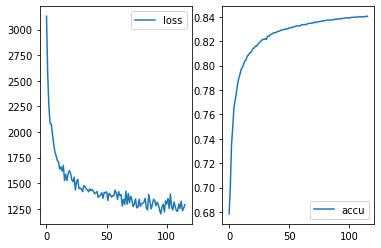

In [8]:
from tqdm import tqdm
import numpy as np

EPOCHS = 200
EARLY_STOP = 20
INITIAL_LR = 0.1
DECAY = 0.99

def simple_optimizer(params, lr, batch_sz):
    with torch.no_grad():
        for param in params:
            param -= param.grad * lr / batch_sz
            param.grad.zero_()

def train_epoch(model, dataset, loss, optimizer, lr):
    for x_b, y_b in tqdm(dataset):
        y_hat = model(x_b)
        l = loss(y_b, y_hat)
        last_loss = l.sum()
        last_loss.backward()
        optimizer([weights, biases], lr=lr, batch_sz=len(x_b))
    return last_loss.detach().numpy()

def decay(lr):
    return lr * DECAY

lr = INITIAL_LR
loss_hist = []
accu_hist = []
for epoch in range(EPOCHS):
    loss = train_epoch(net, train_iter, crossentropy, simple_optimizer, lr)
    accu = eval_accuracy(net, train_iter)
    loss_hist.append(loss)
    accu_hist.append(accu)
    print(f'{epoch=} {lr=:.4f} {loss=:.4f} {accu=:.4f}')
    lr = decay(lr)


    if np.argmin(np.array(loss_hist)) < (len(loss_hist) - EARLY_STOP):
        print("Early stop")
        break

plt.figure()
fig, axs = plt.subplots(1,2)
axs[0].plot(loss_hist, label="loss")
axs[0].legend()
axs[1].plot(accu_hist, label="accu")
axs[1].legend()
plt.show()
